## Task Explanation

Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’. 

As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.

Suggest teams or players a company should endorse for its products.

## Import

In [1]:
import pandas as pd
pd.set_option('display.max_column', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter, defaultdict
import ipywidgets as widgets


## Load data

In [2]:
d_data =  pd.read_csv('deliveries.csv')
m_data = pd.read_csv('matches.csv')

In [3]:
m_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
d_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
m_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Exploratory Data Analysis

Lets visualize the number of teams in each season.

In [6]:
s_team_count = {}
for i in set(m_data['season']):
    s_team_count[i] = len(set(m_data[m_data['season'] == i].loc[:, ['team1', 'team2']].values.flatten()))
s_team_count

{2016: 8,
 2017: 8,
 2018: 8,
 2019: 8,
 2008: 8,
 2009: 8,
 2010: 8,
 2011: 10,
 2012: 9,
 2013: 9,
 2014: 8,
 2015: 8}

In [7]:
s_team_count = pd.DataFrame.from_dict(s_team_count, orient = 'index', columns = ['count'])
s_team_count.index.name = 'Season'
s_team_count.reset_index(inplace = True)
s_team_count = s_team_count.sort_values('Season')
s_team_count.reset_index(drop = True, inplace = True)

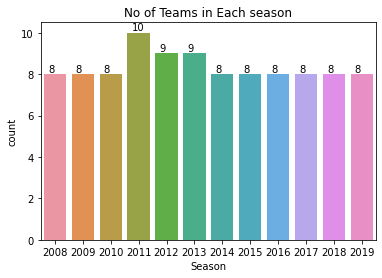

In [8]:
sns.barplot(data = s_team_count, y= 'count', x = 'Season')
plt.title('No of Teams in Each season')
for i, v in s_team_count.iterrows():
    plt.text(i - 0.25, v['count']+ 0.1 , str(v['count']))

In some seasons, there were 9 or 8 teams but mostly there were only 8 teams.

Text(0.5, 1.0, 'Total number of matches in each Season')

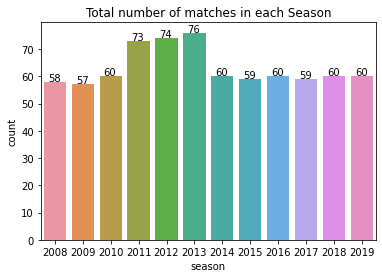

In [9]:
s_play = m_data.groupby('season', as_index = False).count().loc[:,['season', 'id']]
s_play.columns = ['season', 'count']
sns.barplot(x  = 'season', y = 'count', data =s_play )
for i, v in s_play.iterrows():
    plt.text(i - 0.25, v['count'] + 0.35, str(v['count']))
plt.title('Total number of matches in each Season')

It seems 1 or 2 records of matches are missing in some season. Let's ignore it since the number of case is very low. Ideally a Season with 8 teams should have 60 matches. 

In [10]:
@widgets.interact(season = widgets.IntSlider(min = 2008, max = 2019, step = 1, description = 'Season'))
def team_matches(season):
    t = pd.DataFrame.from_dict(Counter(m_data[m_data['season'] == season].loc[:, 'team1']) + Counter(m_data[m_data['season'] == season].loc[:,'team2']),
                                 orient = 'index')
    t.sort_values(0, ascending = False, inplace = True)
    t.plot(kind = 'bar', legend = None, title = 'No of matches for each team in {} IPL'.format(season))
    plt.xlabel('Team Name')
    plt.ylabel('Count')
    plt.xticks(rotation = 45, ha = 'right')


interactive(children=(IntSlider(value=2008, description='Season', max=2019, min=2008), Output()), _dom_classes…

The above plot further verifies the missing data in some seasons.

In [11]:
@widgets.interact(season = widgets.IntSlider(min = 2008, max = 2019, step = 1, description = 'Season'))
def season_win_percentage(season):
    if isinstance(season, int):
        season = [season]
    if isinstance(season, tuple):
        season = list(range(season[0], season[1]+1))
        
    fig, ax = plt.subplots(1, 2, figsize = (18, 6))
    ## total number of wins in all season  
    win_total = pd.DataFrame.from_dict(Counter(m_data[m_data['season'].isin(season)].loc[:, 'winner']), orient = 'index').sort_values(0, ascending = False)
    win_total.columns = ['Total Wins']
    win_total.drop(win_total[win_total.index.isnull()].index, inplace = True)


    ## Total matches in all season
    # Since some matches got cancelled due to rain, we are not accounting those matches.
    win_total['Total Matches'] = pd.Series(Counter(m_data[m_data['season'].isin(season)].loc[:, 'team1']) + Counter(m_data[m_data['season'].isin(season)].loc[:, 'team2']) - 
            Counter(m_data[(m_data['winner'].isnull()) & (m_data['season'].isin(season))].loc[:, ['team1', 'team2']].values.flatten())) 
    win_total['Losses'] = win_total['Total Matches'] - win_total['Total Wins']

    #plot 1
    win_total.plot(kind = 'bar', y = ['Total Wins','Losses'], width = 0.8,ax = ax[0])
    ax[0].set_title('Total number of wins & losses ')
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel('Team Name')
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 45, ha ='right')


    win_total['Percentage Win'] = win_total['Total Wins'] / win_total['Total Matches'] * 100

    # plot2
    win_total.plot(kind = 'bar', y = 'Percentage Win', legend = None, title = 'Percentage win', ax = ax[1])
    ax[1].set_ylabel('Number of Wins')
    ax[1].set_xlabel('Team Name')
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 45, ha ='right')
    ax[1].set_ylim([0, 100])

interactive(children=(IntSlider(value=2008, description='Season', max=2019, min=2008), Output()), _dom_classes…

The above plot describes the seasonwise wins and losses for each season. 

In [12]:
widgets.interact(season_win_percentage, season = widgets.IntRangeSlider(min = 2008, max = 2019, description = 'Season'))

interactive(children=(IntRangeSlider(value=(2010, 2016), description='Season', max=2019, min=2008), Output()),…

<function __main__.season_win_percentage(season)>

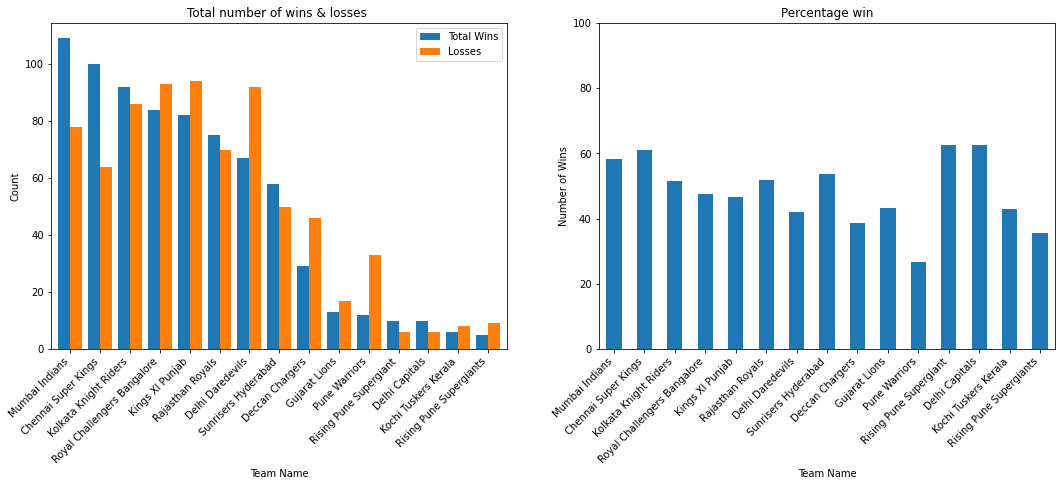

In [13]:
season_win_percentage(list(set(m_data['season'])))

In [14]:
merged = pd.merge(m_data, d_data, left_on = 'id', right_on = 'match_id', how = 'inner').loc[:, ['match_id',
 'inning',
 'season',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']]             
merged.head()

,match_id,inning,season,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
bat_merged = merged.groupby(['season', 'match_id', 'batting_team'], as_index = False).sum()
bow_merged = merged.groupby(['season', 'match_id', 'bowling_team'], as_index = False).sum()
bow_merged.head()

,season,match_id,bowling_team,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,2008,60,Kolkata Knight Riders,202,826,383,0,11,0,8,0,0,63,19,82
1,2008,60,Royal Challengers Bangalore,124,1293,448,0,9,4,4,0,0,205,17,222
2,2008,61,Chennai Super Kings,248,1295,449,0,5,2,4,0,0,196,11,207
3,2008,61,Kings XI Punjab,124,1291,449,0,3,0,2,1,0,234,6,240
4,2008,62,Delhi Daredevils,122,1274,434,0,3,1,3,0,0,122,7,129


In [16]:
sl1 = widgets.IntRangeSlider(value = None, min = 2008, max = 2019, description = 'Season')
sl2 = widgets.Dropdown(description = 'Team name', options = list(set(merged[merged['season'].isin(list(range(sl1.value[0], sl1.value[1]+1)))].loc[:, ['batting_team', 'bowling_team']].values.flatten())))
def f(change):
    sl2.options = list(set(merged[merged['season'].isin(list(range(change['new'][0], change['new'][1]+1)))].loc[:, ['batting_team', 'bowling_team']].values.flatten()))
sl1.observe(f, 'value')

In [17]:
@widgets.interact(season = sl1, team_name = sl2)
def team_stat(season, team_name):
    if isinstance(season, int):
        season = [season]
    if isinstance(season, tuple):
        season = list(range(season[0], season[1]+1))
    fig, ax = plt.subplots(2, 2, figsize = [10, 10])
    ## batting stats
    data = bat_merged[(bat_merged['season'].isin(season)) & (bat_merged['batting_team'] == team_name)]
    # Plot 1
    data.loc[:, 'batsman_runs':].mean().plot(kind = 'bar',
                                             title = 'Avg Runs scored', ax = ax[0, 0])
    ax[0, 0].set_ylabel('Runs')
    ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation = 45, ha = 'right')
    # Plot 2
    data.loc[:, 'is_super_over':'penalty_runs'].mean().plot(kind = 'bar', title = 'Avg Extra Runs', ax = ax[0, 1])
    ax[0, 1].set_ylabel('Runs')
    ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation = 45, ha = 'right')
    
    ## Bowling Stats
    data = bow_merged[(bow_merged['season'].isin(season)) & (bat_merged['batting_team'] == team_name)]
    # Plot 1
    data.loc[:, 'batsman_runs':].mean().plot(kind = 'bar',
                                             title = 'Avg Runs Opponents scored', ax = ax[1, 0])
    ax[1, 0].set_ylabel('Runs')
    ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation = 45, ha = 'right')
    # Plot 2
    data.loc[:, 'is_super_over':'penalty_runs'].mean().plot(kind = 'bar', title = 'Avg Extra Opponents Runs', ax = ax[1, 1])
    ax[1, 1].set_ylabel('Runs')
    ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation = 45, ha = 'right')
    
    plt.tight_layout()

interactive(children=(IntRangeSlider(value=(2010, 2016), description='Season', max=2019, min=2008), Dropdown(d…

Text(0, 0.5, 'Player Name')

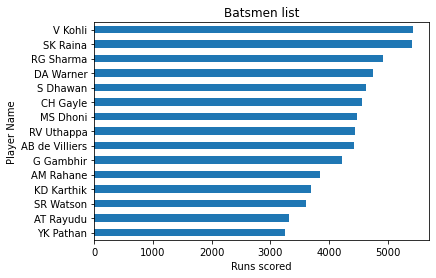

In [18]:
merged.groupby('batsman').sum().sort_values(['batsman_runs'], 
                    ascending  = True)['batsman_runs'][-15:].plot(kind = 'barh', title = 'Batsmen list')
plt.xlabel('Runs scored')
plt.ylabel('Player Name')

Text(0, 0.5, 'Player Name')

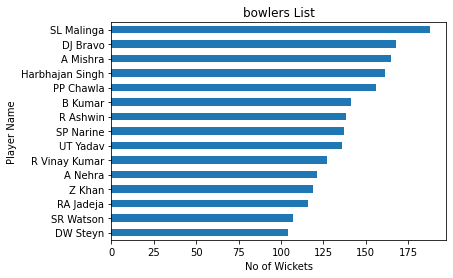

In [19]:
pd.DataFrame.from_dict(Counter(merged.dropna(subset = ['player_dismissed']).loc[:, 'bowler'].values), orient = 'index').sort_values(0, 
                            ascending = True)[-15:].plot(kind = 'barh', title = 'bowlers List', legend = None)
plt.xlabel('No of Wickets')
plt.ylabel('Player Name')

In [20]:
@widgets.interact(season = widgets.IntRangeSlider(min = 2008, max = 2019))
def player_stat(season):
    if isinstance(season, int):
        season = [season]
    if isinstance(season, tuple):
        season = list(range(season[0], season[1]+1))
    merged[merged['season'].isin(season)].groupby('batsman').sum().sort_values(['batsman_runs'], 
                    ascending  = True)['batsman_runs'][-15:].plot(kind = 'barh', title = 'Batsmen list')
    plt.xlabel('Runs scored')
    plt.ylabel('Player Name')
    pd.DataFrame.from_dict(Counter(merged[merged['season'].isin(season)].dropna(subset = ['player_dismissed']).loc[:, 'bowler'].values), orient = 'index').sort_values(0, 
                            ascending = True)[-15:].plot(kind = 'barh', title = 'bowlers List', legend = None)
    plt.xlabel('No of Wickets')
    plt.ylabel('Player Name')


interactive(children=(IntRangeSlider(value=(2010, 2016), description='season', max=2019, min=2008), Output()),…

For player selection, consistency play and their play on last 2 or 3 years is more of an important factor.

if we were to consider the last 5 years b kumar has more wickets than most players. But in the last 2 years bumrah and rashid khan has more wickets than b Kumar.